1. Name: Jackson Meyer

2. Problem: I have a data file that has customer information for a telecommuncations company. I am trying to create a model that can predict with a good accuracy whether or not a customer is likely to leave, which we call churn. 

3. Data: Target Feature : Churn - Binary. Yes or No. Whether or not the customer stopped doing business with the company
         Customer ID - removed from predictor columns. Used for identifying customer, but has no impact on their decision to            churn or not.
         Predictor Variables: BINARY(Default= Yes OR No). 
         Gender - Binary. Male or Female. Important for seeing demographics of customers churning.
         SeniorCitizen - Binary. Important for seeing whether or not age has an impact on churning. 
         Partner - Binary. Important for seeing whether Romantic relationships and increase in combined income impacts                  churning. 
         Dependents - Binary. Important for seeing whether having dependnets and thus increased expenditures has an impact on            churning.
         Tenure - Numerical. Number of months the customer has stayed with the company. Import for seeing if there are hotspots          on time with the company that dictate churning. 
         PhoneService - Binary. Important to see if being a member of the phone service negatively or positively impacts                churning.
         Multiple Lines - Binary. Yes or No/No phone service. Important to see if customers with one lines or multiple lines            are more content and the impact on churning.
         InternetService - Internet service provided. DSL, Fiber Optic, No. Important to see whether or not purchasing DSL or            Fiber Optic has a greater impact on churning or if no internet service at all has the greater impact. 
         OnlineSecurity - Binary. Yes or No/No internet service. Important to see whether or not having extra security measures          and an increased sense of safety with the company impacts churning.
         OnlineBackup - Binary. Yes or No/No internet service. Important to see if extra security measures with backup storage          for computers or other devices with access to the internet has impact on churning. 
         DeviceProtection - Binary. Yes or No/No internet service. Important to see whether or not backing up your devices              gives a sense of reassurance and the relationship it has with churning.
         TechSupport - Binary. Yes or No/No internet service. Important to see what kind of relationship exists between                  having/not having a positive relationship with tech support workers at the telecom company and churning. 
         StreamingTV - Binary. Yes or No/No internet service. Important to see whether or not having access to a TV that can            stream shows dictates churning.
         StreamingMovies - Binary. Yes or No/No internet service. Important to see whether or not being able to stream movies            on demand has a impact on churning.
         Contract - Month-to-month, One year, Two year. Important to see if the company should focus more on one type of                contract than the others because it has a greater impact on less overall churning. 
         PaperlessBilling - Binary. Imporant to see if the company should use paper or paperless billing for less churning. 
         PaymentMethod - Electronic Check, Mailed Check, Bank Transfer (Automatic), Credit Card (automatic). Important to see            if there is any payment methods the company should move away from or encourage more of with their customers to have            less churning. 
         MonthlyCharges - The amount charged to the customer monthly. Important to see what price ranges for monthly payments            are casuing the most churning and which ones are causing the least.
         TotalCharges - The total amount charged to the customer throughout their entire time with the company. Similar to the          MonthlyCharges, but sees if there is a possible 'limit-like' behavior for total money spent. In other words, does              there reach a amount where the customer doesn't want to spend any more. 
            

4. Data Preparation: I had to do a lot of manipulation to the data. The first thing I did was remove any null values. I notice that there were several values in the 'TotalCharges' column that were missing but had a space for a value. Before removing all null values, I converted all 'TotalCharges' values equal to ' ' to null values. Next I noticed that there were 6 columns that had values (Yes, No, No internet service) and 1 column with (Yes, No, No phone service). To make these categorical columns binary, I changed all values that equaled 'No internet service' or 'No phone service' to just 'No'. There was also one categorical column 'SeniorCitizen' that had values 1 and 0. I converted all values equal to 1 to 'Yes' and 0 to 'No'. Next I wanted to scale all the numerical values using a StandardScaler. However, I did not want to group tenure as a numerical value with 'MonthlyCharges' and 'TotalCharges'. I did not think it made sense to scale tenure, so I made it a categorical variable by converting the unit of months to years, and created 6 clusters, 0-1 years, 1-2 years,.... all the way to 5+ years. I then used a standard scaler on the 'MonthlyCharges' and 'TotalCharges' to normalize the data. Now I needed to finalize all my predictor variables by making them usable by my several models. The numerical predictors were already set, so I divided the categorical variables into binary ones and non-binary ones, or rather variables with 2 unique values and variables with >2 unique variables. I used a label enconder on the binary elements to convert to 2 seperate and distinct integer values. I did not want to use a label encoder for non-binary categorical variables, so instead I created dummy variables, and replaced the original columns by dropping them and merging the new dummy columns with their values. I then used train_split_test to create and created x_test, y_test, x_train, y_train to use with my models.         

5. Metrics: For each of the models I create, I will be testing them with a confusion matrix and accuracy score . We are dealing with a classification problem and these metrics work well with categorical variables. We would not use a r2_score or MSE because those metrics measure how close predictoins are for continous variables, but not if the predictions were correct or incorrect for categorical variables. For the predictions that are incorrect, I do a breakdown comparing ones that incorrectly predict they will not churn, when in fact they do, and vice versa. That is done very easily with a confusion matrix. I will use that to see if the model predicts that the company would lose custoemrs when they think it wouldn't or if the model predicts they lose will lose customers when they actually wouldn't. For this problem, it would be worse if the company was predicting customers to not churn, when they actually will.  

6.  Baseline Performance: The baseline I used for my metrics was to assume that every customer would stay. This is a good baseline because it represents what would happen if you assume everything is going well and the company does not need to change anything. We can then compare that accuracy score to ones generated from our models to see which ones yield better results than essentially changing nothing. 

7. Model Planning and Execution: I will used four learning algorithms models 1.K-Nearest Neighbor, 2. DecisionTree, 3.Random Forest, 4. Perceptron. For K-Nearest Neighbor I will tune the value for K and make it weighted. This will allow me to find a optimal k value and see the impact on using weight distance to find nearest neighbors. For decision tree I will tune criterion and max_depth. It will allow me to see results based on Gini impurity vs Entropy and if shorter or longer trees perform better. For random forest, I will tune the same parameters as decision tree with addition to n_estimators - the number of trees in the forest. Given that random forest is a collection of decision trees, I want to see if tuning the same parameters has a direct relationship or not and then look at number of trees. For perceptron, I will tune the learning rate(eta0). The learning rate is default at 1 . I will see if decreasing this value increases our accuracy.      

8. Results: After tuning the parameters, the models had significant changes. In the beginning, most of the models were very close to the baseline accuracy score. Sometimes the random forest and perceptron performed better. When changing the parameters, all of the models performed better on average. The KNN optimal k value was always much greater than 5 and the weighted knn perfomred better than the nonweighed version. The Decision Tree had a default max depth of none. Normally the max depth would be ideal in between 1-10 and the entropy criterion performed slighly better than gini criterion, although the change in depth was more important to increasing accuracy score. The same was said for the Random forest. The entropy criterion performed better and the depth was always best in between 1-10. The n estimators variable was quite random. It ranged between 10-50 for ideal values depending on the split of the test and training data for the model. While it was not consistent, when an optimal value was found the accuracy scores were always much higher.     

9. Recommendation: The company should used a random forest model with tuned parameters. If the baseline for not doing anything gives us a 73% accuracy score, the random forest with tuned parameters produces an accuracy score that averages over 80% consistently. That is atleast a 7% increase in accuracy and would lead to an increase in the rate at which the company retains customers which is directly correlated to the success of the company. I have included accuracy scores and confusions matrices as well as a bar chart comparing before and after tuning the models and their respective metrics.  

10. Insights: For all the confusion matrices produced, it appears that most of the time there is a signifcantly more amount of predictions that they will churn when in fact they will not compared to predictions when they think they won't churn when in fact they will. This means that the company would actually do better than what our models predict in terms of accuracy more of the time. Since more of our wrong predictions are benefical rather than bad for the company, you could assume that our model is better than doing nothing, but still possibilty and underapproximation of how well it does! 




In [324]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

# put vehicles data into a dataframe
telco_data = pandas.read_csv("Telcom_churn.csv")

# Predictor and target variables
predictors = telco_data.columns.tolist()
predictors.remove('Churn')
predictors.remove('customerID')
target = ['Churn']





# drop any rows with null predictor column values
telco_data['TotalCharges'] = telco_data['TotalCharges'].replace(' ',numpy.nan)
telco_data = telco_data.dropna(subset=predictors)

# change no phone service and no internet service to no
no_int_ser_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in no_int_ser_cols : 
    telco_data[i]  = telco_data[i].replace(to_replace='No internet service', value = 'No')
telco_data['MultipleLines'] = telco_data['MultipleLines'].replace(to_replace='No phone service', value = 'No')
telco_data['SeniorCitizen'] = telco_data['SeniorCitizen'].replace(to_replace=1, value = 'Yes')
telco_data['SeniorCitizen'] = telco_data['SeniorCitizen'].replace(to_replace=0, value = 'No')

# make tenure a categorical variable clustered by years
def tenure_months_to_years(data):
    if data['tenure'] <= 12 :
        return '0-1_years'
    elif (data['tenure'] > 12) & (data['tenure'] <= 24 ):
        return '1-2_years'
    elif (data['tenure'] > 24) & (data['tenure'] <= 36) :
        return '2-3_years'
    elif (data['tenure'] > 36) & (data['tenure'] <=48) :
        return '3-4_years'
    elif (data['tenure'] > 48) & (data['tenure'] <=60) :
        return '4-5_years'
    elif data['tenure'] > 60 :
        return '5+_years'

telco_data['tenure'] = telco_data.apply(lambda telco_data : tenure_months_to_years(telco_data),axis=1)

# seperate all categorical variables from numerical variables
categorical= telco_data.nunique()[telco_data.nunique()<7].keys().tolist()
categorical.remove('Churn')
numerical = [element for element in telco_data.columns if element not in categorical]
numerical.remove('Churn')
numerical.remove('customerID')

# split categorical variables into binary ones and ones with multiple(>2) unique values
binary = telco_data.nunique()[telco_data.nunique() ==2].keys().tolist()
multiple = [element for element in categorical if element not in binary]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# create a label encoder and standard scaler
label_enc = LabelEncoder()
scaler = StandardScaler()

# create dummy variables for non binary categorical variables
telco_data = pandas.get_dummies(data = telco_data, columns = multiple)

# use label encoder on binary variables
for element in binary:
    telco_data[element] = label_enc.fit_transform(telco_data[element])
    
# use standard scaler on the numerical variables to normalize them
scaled_vals = scaler.fit_transform(telco_data[numerical])
scaled_df = pandas.DataFrame(scaled_vals, columns=numerical)

# drop old non binary categorical variables. Merge dataset with dummy variable columns
telco_data_mod = telco_data.drop(columns = numerical, axis=1)
telco_data_mod = telco_data_mod.merge(scaled_df,how = 'left', left_index=True, right_index=True)

# create the new predictors involving the dummy variables
new_predictors = telco_data_mod.columns.tolist()
new_predictors.remove('customerID')
new_predictors.remove('Churn')

# split the data into training and test subsets
(tel_train,tel_test) = train_test_split(telco_data,test_size=.2)
x_test = tel_test[new_predictors]
y_test = tel_test[target]
x_train = tel_train[new_predictors]
y_train = tel_train[target]
y_train = numpy.ravel(y_train)

#

In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# create a baseline for accuracy score
num_churn = telco_data['Churn'].value_counts()
base_acc = (num_churn[0])/(num_churn[0] + num_churn[1])

# create a weighted knn regression model
knn_model = KNeighborsClassifier()

# train the model on the training data subsets
knn_model.fit(x_train,(y_train))

# test the models by predicting target values based on the test data subset
knn_preds = knn_model.predict(x_test)

# compute and return the mean squared error for the knn and weighted knn models
knn_acc = accuracy_score(y_test,knn_preds)

# create a decision tree for regression and train the model on training data subset
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# test the model by predicting target values for the test data subset
dt_preds = dt_model.predict(x_test)

# compute and return the mean squared error for the decision tree
dt_acc = accuracy_score(y_test,dt_preds)

# create and fit random forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

# predict and test accuracy score on random forest model
rf_preds = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test,rf_preds)

# create and fit perceptron model
perc_model = Perceptron()
perc_model.fit(x_train, y_train)

# predict and test accuracy score on perceptron model
perc_preds = perc_model.predict(x_test)
perc_acc = accuracy_score(y_test, perc_preds)

print('Base acc', base_acc)
print('KNN ACC=', knn_acc)
print(confusion_matrix(y_test, knn_preds))
print('dt_acc', dt_acc)
print(confusion_matrix(y_test, dt_preds))
print('rf_acc=', rf_acc)
print(confusion_matrix(y_test, rf_preds))
print("perc_acc=", perc_acc)
print(confusion_matrix(y_test, perc_preds))


Base acc 0.7342150170648464
KNN ACC= 0.7668798862828714
[[929 129]
 [199 150]]
dt_acc 0.7228144989339019
[[848 210]
 [180 169]]
rf_acc= 0.7796730632551528
[[953 105]
 [205 144]]
perc_acc= 0.7604832977967306
[[967  91]
 [246 103]]


C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [326]:
# tune parameters for knn. find optimal k value and make weighted
k = 0
optimal = False 
prev = 0
vals = []
while (k<=100):
    
    wknn_model = KNeighborsClassifier(n_neighbors = k+1, weights = "distance")
    wknn_model.fit(x_train,y_train)
    wknn_preds = wknn_model.predict(x_test)
    acc = accuracy_score(y_test,wknn_preds)
    vals.insert(k,acc)
    k = k + 1
    
wknn_acc = max(vals)
k_val = vals.index(max(vals))


# tune parameters for decisoin tree. find optimal depth with entropy instead of gini
n = 0
vals2 = []
while(n<=20):
    tuned_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = n+1)
    tuned_dt_model.fit(x_train, y_train)
    tuned_dt_preds = tuned_dt_model.predict(x_test)
    acc2 = accuracy_score(y_test,tuned_dt_preds)
    vals2.insert(n,acc2)
    n = n + 1

tuned_dt_acc = max(vals2)
depth_val = vals2.index(max(vals2))


# tune parameters for random forest. find optimal depth with entropy instead of gini
n2 = 0
vals3 = []
while(n2<=50):
    tuned_rf_model = RandomForestClassifier(max_depth=n2+1 ,criterion = 'entropy')
    tuned_rf_model.fit(x_train, y_train)
    tuned_rf_preds = tuned_rf_model.predict(x_test)
    acc3 = accuracy_score(y_test,tuned_rf_preds)
    vals3.insert(n,acc3)
    n2 = n2 + 1
    
est_val = vals3.index(max(vals3))

n2 = 0
vals3 = []
while(n2<=50):
    tuned_rf_model = RandomForestClassifier(n_estimators=n2+1 ,criterion = 'entropy', max_depth=est_val)
    tuned_rf_model.fit(x_train, y_train)
    tuned_rf_preds = tuned_rf_model.predict(x_test)
    acc3 = accuracy_score(y_test,tuned_rf_preds)
    vals3.insert(n,acc3)
    n2 = n2 + 1

tuned_rf_acc = max(vals3)
est_val = vals3.index(max(vals3))

# test differnet values for learning rate of perceptron

tuned_perc_model = Perceptron(eta0 =.2 )
tuned_perc_model.fit(x_train, y_train)
tuned_perc_preds = tuned_perc_model.predict(x_test)
tuned_perc_acc = accuracy_score(y_test, tuned_perc_preds)


C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jackson Meyer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jackson Meyer\Anaconda3\lib\site-pa

Base acc 0.7342150170648464
WKNN Accuracy= 0.7967306325515281
[[996  62]
 [233 116]]
Tuned DT Accuracy 0.7974413646055437
[[848 210]
 [180 169]]
Tuned RF Accuracy= 0.8187633262260128
[[973  85]
 [177 172]]
Tuned Perc Accuracy= 0.7604832977967306
[[967  91]
 [246 103]]


Text(0.5, 1.0, 'Telecom Model Accuracy Scores')

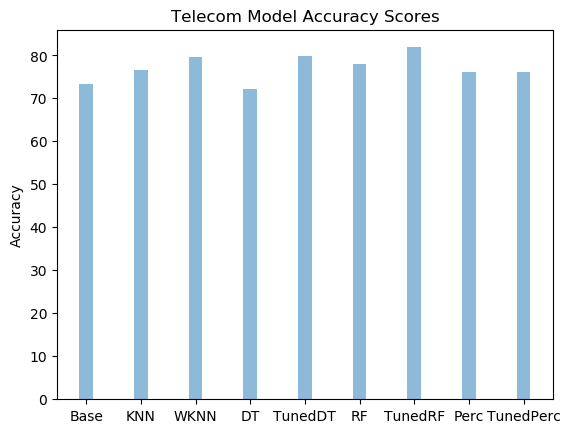

In [327]:
print('Base acc', base_acc)
print('WKNN Accuracy=', wknn_acc)
print(confusion_matrix(y_test, wknn_preds))
print('Tuned DT Accuracy', tuned_dt_acc)
print(confusion_matrix(y_test, dt_preds))
print('Tuned RF Accuracy=', tuned_rf_acc)
print(confusion_matrix(y_test, tuned_rf_preds))
print("Tuned Perc Accuracy=", tuned_perc_acc)
print(confusion_matrix(y_test, tuned_perc_preds))

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

x_vals = ('Base', 'KNN','WKNN', 'DT', 'TunedDT', 'RF', 'TunedRF', 
           'Perc', 'TunedPerc')
y_pos = numpy.arange(len(x_vals))
percents = [100*base_acc,100*knn_acc,100*wknn_acc,100*dt_acc,
            100*tuned_dt_acc,100*rf_acc,100*tuned_rf_acc,100*perc_acc,100*tuned_perc_acc]
plt.bar(y_pos, percents, align='center', alpha=0.5, width=.25)
plt.xticks(y_pos, x_vals)
plt.ylabel('Accuracy')
plt.title('Telecom Model Accuracy Scores')



